# **Crawling & Ekstraksi Kalimat dari Berita Online**

In [2]:
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3728385/live-action-one-piece-resmi-berlanjut-ke-musim-kedua-di-netflix"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div' ,class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
sentences = nltk.sent_tokenize(article_text)

# Cetak kalimat-kalimat
for sentence in sentences:
    print(sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



				Jakarta (ANTARA) - Serial live-action “One Piece” dipastikan berlanjut ke musim kedua di layanan streaming video Netflix.
Hal itu diumumkan langsung oleh Netflix lewat media sosialnya, tepat dua minggu setelah serial tersebut debut di layanan streaming.
Dalam laporan Variety, Kamis (14/9), serial yang berdasarkan manga dan anime populer dengan nama sama, “One Piece” mengisahkan petualangan Monkey D. Luffy, seorang bajak laut muda yang mencari harta karun One Piece.
Jika dia bisa melakukannya, dia akan menjadi Raja Bajak Laut.
Baca juga: Kajol dan Kriti Sanon akan bintangi film thriller Netflix "Do Patti"

Dalam serial 3 aktor Iñaki Godoy berperan sebagai Luffy.
Pemerannya lainnya termasuk Mackenyu sebagai Roronoa Zoro, Emily Rudd sebagai Nami, Jacob Romero sebagai Usopp, dan Taz Skylar sebagai Sanji.
Ada juga pemeran tambahan adalah Vincent Regan, Ilia Isorelýs Paulino, Morgan Davies, Aidan Scott, Langley Kirkwood, Jeff Ward, Celeste Loots, Alexander Maniatis, McKinley Belcher III

# **Bentuk TF-IDF dari Kalimat**

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
				Jakarta (ANTARA) - Serial live-action “One Piece” dipastikan berlanjut ke musim kedua di layanan streaming video Netflix.
action: 0.2514
antara: 0.2514
berlanjut: 0.2896
di: 0.2244
dipastikan: 0.2896
jakarta: 0.2896
ke: 0.2514
kedua: 0.2244
layanan: 0.2514
live: 0.2514
musim: 0.2244
netflix: 0.1718
one: 0.2034
piece: 0.2034
serial: 0.1481
streaming: 0.2514
video: 0.2896

Kalimat 2: Hal itu diumumkan langsung oleh Netflix lewat media sosialnya, tepat dua minggu setelah serial tersebut debut di layanan streaming.
debut: 0.2533
di: 0.1963
diumumkan: 0.2533
dua: 0.2200
hal: 0.2533
itu: 0.2200
langsung: 0.2533
layanan: 0.2200
lewat: 0.2533
media: 0.2533
minggu: 0.2200
netflix: 0.1503
oleh: 0.1963
serial: 0.1296
setelah: 0.2533
sosialnya: 0.2533
streaming: 0.2200
tepat: 0.2533
tersebut: 0.2533

Kalimat 3: Dalam laporan Variety, Kamis (14/9), serial yang berdasarkan manga dan anime populer dengan nama sama, “One Piece” mengisahkan petualangan Monkey D. Luffy, seorang bajak lau

# **Bentuk Cosinus Similaritas**

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")



Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1997


In [5]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1997
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.1192
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0485
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0226
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0699
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.1029
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0401
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0303
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.1045
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.3084
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.0816
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.0122
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.0424
Cosine Similarity antara 

In [6]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15
Kalimat 1,1.000000,0.199667,0.119234,0.000000,0.048508,0.000000,0.000000,0.022579,0.069872,0.102877,0.040144,0.030282,0.104487,0.308438,0.081641
Kalimat 2,0.199667,1.000000,0.012211,0.000000,0.042434,0.000000,0.000000,0.019752,0.000000,0.124505,0.121425,0.087272,0.000000,0.045719,0.034478
Kalimat 3,0.119234,0.012211,1.000000,0.083745,0.089054,0.010305,0.008465,0.070169,0.122901,0.084941,0.010892,0.055581,0.000000,0.108780,0.009323
Kalimat 4,0.000000,0.000000,0.083745,1.000000,0.040616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035610,0.028773
Kalimat 5,0.048508,0.042434,0.089054,0.040616,1.000000,0.111869,0.032383,0.186508,0.085175,0.185609,0.068287,0.073690,0.033940,0.064493,0.514950
Kalimat 6,0.000000,0.000000,0.010305,0.000000,0.111869,1.000000,0.009824,0.138755,0.100187,0.025386,0.000000,0.000000,0.106302,0.000000,0.010821
Kalimat 7,0.000000,0.000000,0.008465,0.000000,0.032383,0.009824,1.000000,0.066835,0.011237,0.037337,0.000000,0.029033,0.000000,0.000000,0.036993
Kalimat 8,0.022579,0.019752,0.070169,0.000000,0.186508,0.138755,0.066835,1.000000,0.199510,0.121810,0.084053,0.089905,0.144550,0.035192,0.030162
Kalimat 9,0.069872,0.000000,0.122901,0.000000,0.085175,0.100187,0.011237,0.199510,1.000000,0.140060,0.000000,0.048209,0.174012,0.146017,0.012376
Kalimat 10,0.102877,0.124505,0.084941,0.000000,0.185609,0.025386,0.037337,0.121810,0.140060,1.000000,0.125372,0.205143,0.000000,0.000000,0.250126


# **Bentuk Grafik dari Cosinus Similaritas**

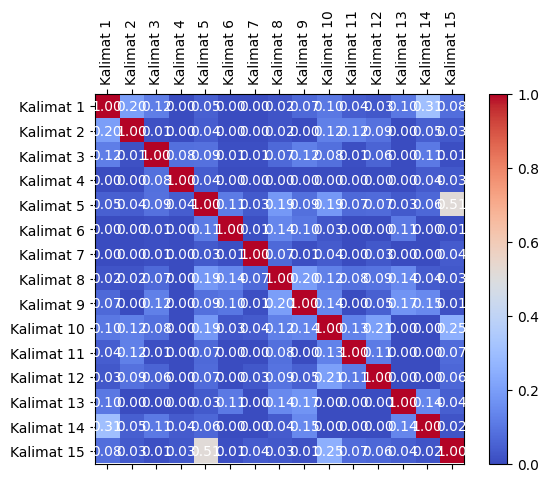

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


# **Hitung Closeness Centrality**

In [8]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")


Closeness Centrality of 
				Jakarta (ANTARA) - Serial live-action “One Piece” dipastikan berlanjut ke musim kedua di layanan streaming video Netflix.: 17.9061
Closeness Centrality of Hal itu diumumkan langsung oleh Netflix lewat media sosialnya, tepat dua minggu setelah serial tersebut debut di layanan streaming.: 28.3334
Closeness Centrality of Dalam laporan Variety, Kamis (14/9), serial yang berdasarkan manga dan anime populer dengan nama sama, “One Piece” mengisahkan petualangan Monkey D. Luffy, seorang bajak laut muda yang mencari harta karun One Piece.: 35.7748
Closeness Centrality of Jika dia bisa melakukannya, dia akan menjadi Raja Bajak Laut.: 19.3557
Closeness Centrality of Baca juga: Kajol dan Kriti Sanon akan bintangi film thriller Netflix "Do Patti"

Dalam serial 3 aktor Iñaki Godoy berperan sebagai Luffy.: 20.5231
Closeness Centrality of Pemerannya lainnya termasuk Mackenyu sebagai Roronoa Zoro, Emily Rudd sebagai Nami, Jacob Romero sebagai Usopp, dan Taz Skylar sebagai S

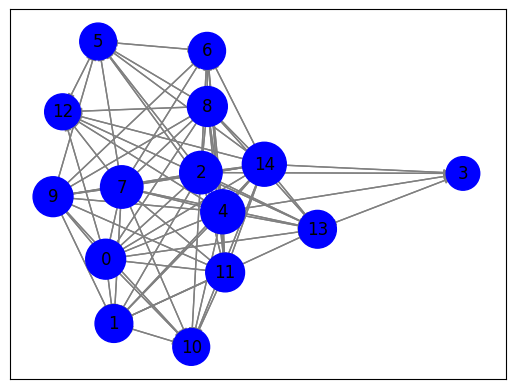

Closeness Centrality:
Node 0: 0.8235
Node 1: 0.7368
Node 2: 0.9333
Node 3: 0.5833
Node 4: 1.0000
Node 5: 0.7000
Node 6: 0.7000
Node 7: 0.9333
Node 8: 0.8235
Node 9: 0.8235
Node 10: 0.7000
Node 11: 0.7778
Node 12: 0.6667
Node 13: 0.7368
Node 14: 1.0000

 

Closeness Centrality (Urutan Menurun):
Node 4: 1.0000
Node 14: 1.0000
Node 2: 0.9333
Node 7: 0.9333
Node 0: 0.8235
Node 8: 0.8235
Node 9: 0.8235
Node 11: 0.7778
Node 1: 0.7368
Node 13: 0.7368
Node 5: 0.7000
Node 6: 0.7000
Node 10: 0.7000
Node 12: 0.6667
Node 3: 0.5833

 

Closeness Centrality (3 Teratas):
Node 4: 1.0000
Node 14: 1.0000
Node 2: 0.9333
Node 7: 0.9333

 

Closeness Centrality (3 Teratas):
Node 4: 1.0000  Kalimat: Baca juga: Kajol dan Kriti Sanon akan bintangi film thriller Netflix "Do Patti"

Dalam serial 3 aktor Iñaki Godoy berperan sebagai Luffy.

Node 14: 1.0000  Kalimat: Baca juga: Timo Tjahjanto garap film "The Shadow Strays" untuk Netflix

Baca juga: Kajol dan Kriti Sanon akan bintangi film thriller Netflix "Do Pat

In [24]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")
print("\n \n")

# Cetak closeness centrality menurun dari yang tertinggi
print("Closeness Centrality (Urutan Menurun):")
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")
print("\n \n")

print("Closeness Centrality (3 Teratas):")
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:4]
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")
print("\n \n")

# Cetak closeness centrality
print("Closeness Centrality (3 Teratas):")
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

for node, closeness in sorted_closeness:
    sentence = sentences[node]
    print(f"Node {node}: {closeness:.4f}",f" Kalimat: {sentence}\n")
    # print(f"Kalimat: {sentence}\n")
print("\n \n")

# Hitung PageRank
pagerank = nx.pagerank(G)

# Cetak semua nilai PageRank
print("PageRank untuk semua node:")
for node, rank in pagerank.items():
    sentence = sentences[node]
    print(f"Node {node}: {rank:.4f}",f"Kalimat: {sentence}\n")